<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EXPOSICION/TEMA3_BRENDA_LOPEZ_LAYME_ARBOL_DE_DECISION(clasificacion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.Carga de Librerías y del Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import files
uploaded = files.upload()

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("diabetes_prediction_dataset.csv", names=col_names)
df.head()


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (2).csv


/tmp/ipython-input-2-191950545.py:14: DtypeWarning: Columns (1,2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("diabetes_prediction_dataset.csv", names=col_names)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,80.0,0,1,never,25.19,6.6,140,0
2,Female,54.0,0,0,No Info,27.32,6.6,80,0
3,Male,28.0,0,0,never,27.32,5.7,158,0
4,Female,36.0,0,0,current,23.45,5.0,155,0


2: Análisis Exploratorio y Limpieza

In [4]:
# Remove the first row which contains headers
df = df.iloc[1:].copy()

# Convert relevant columns to numeric, coercing errors to NaN
cols_to_numeric = ['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()
df.describe()

# Verificamos ceros sospechosos
(df[['glucose', 'bp', 'skin', 'insulin', 'bmi']] == 0).sum()

# Reemplazo de ceros por la mediana
cols = ['glucose', 'bp', 'skin', 'insulin', 'bmi']
for col in cols:
    df[col] = df[col].replace(0, df[col].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   pregnant  100000 non-null  object 
 1   glucose   100000 non-null  float64
 2   bp        100000 non-null  int64  
 3   skin      100000 non-null  int64  
 4   insulin   0 non-null       float64
 5   bmi       100000 non-null  float64
 6   pedigree  100000 non-null  float64
 7   age       100000 non-null  int64  
 8   label     100000 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 6.9+ MB


3: Visualización de Datos

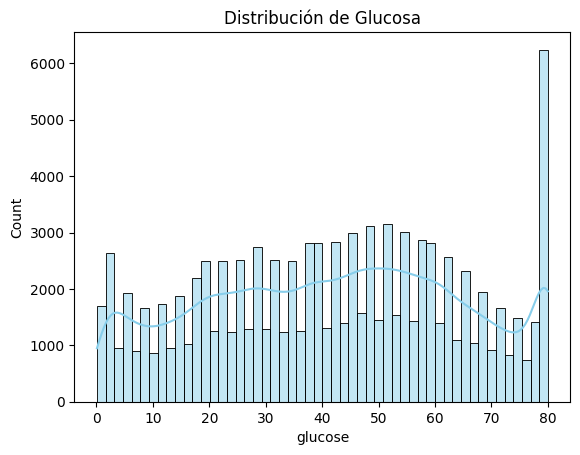

In [17]:
# Glucosa
sns.histplot(df['glucose'], kde=True, color='skyblue')
plt.title("Distribución de Glucosa")
plt.show()

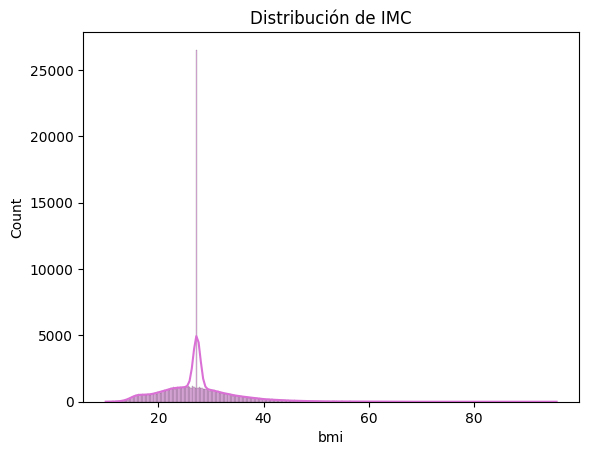

In [18]:
# IMC
sns.histplot(df['bmi'], kde=True, color='orchid')
plt.title("Distribución de IMC")
plt.show()

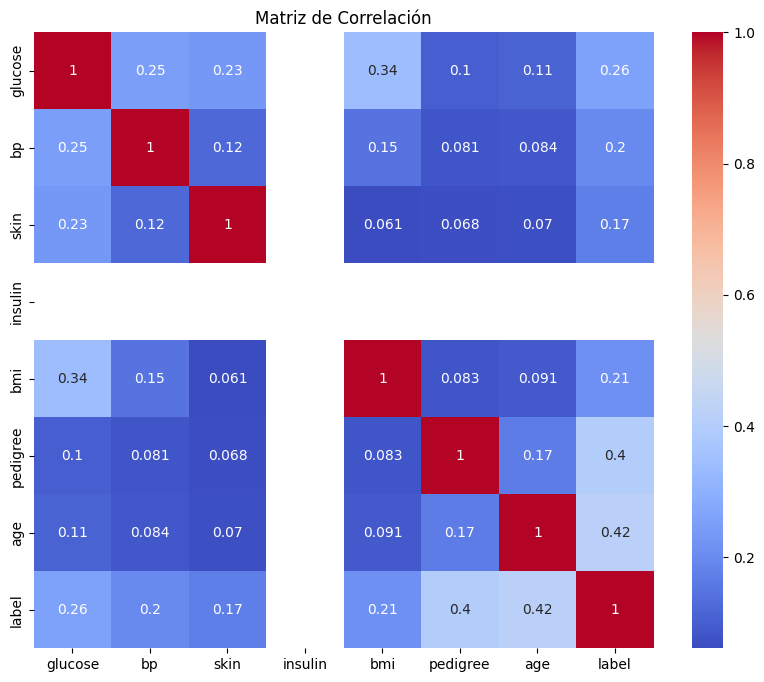

In [19]:

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('pregnant', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

 4: Entrenamiento del Modelo

In [8]:
X = df.drop(['label', 'pregnant'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

5: Evaluación y Visualización

In [21]:
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       1.00      0.67      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.98      0.83      0.89     30000
weighted avg       0.97      0.97      0.97     30000



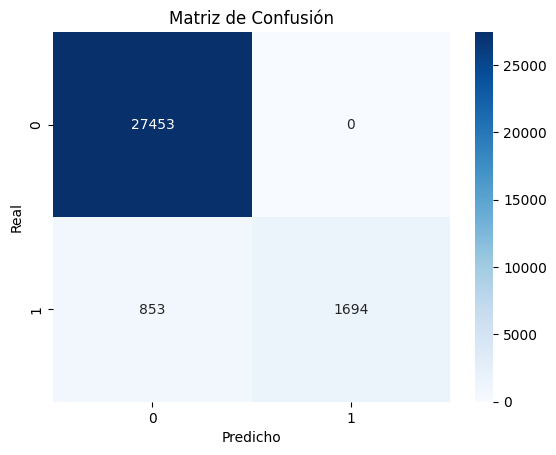

In [22]:
# Matriz de Confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

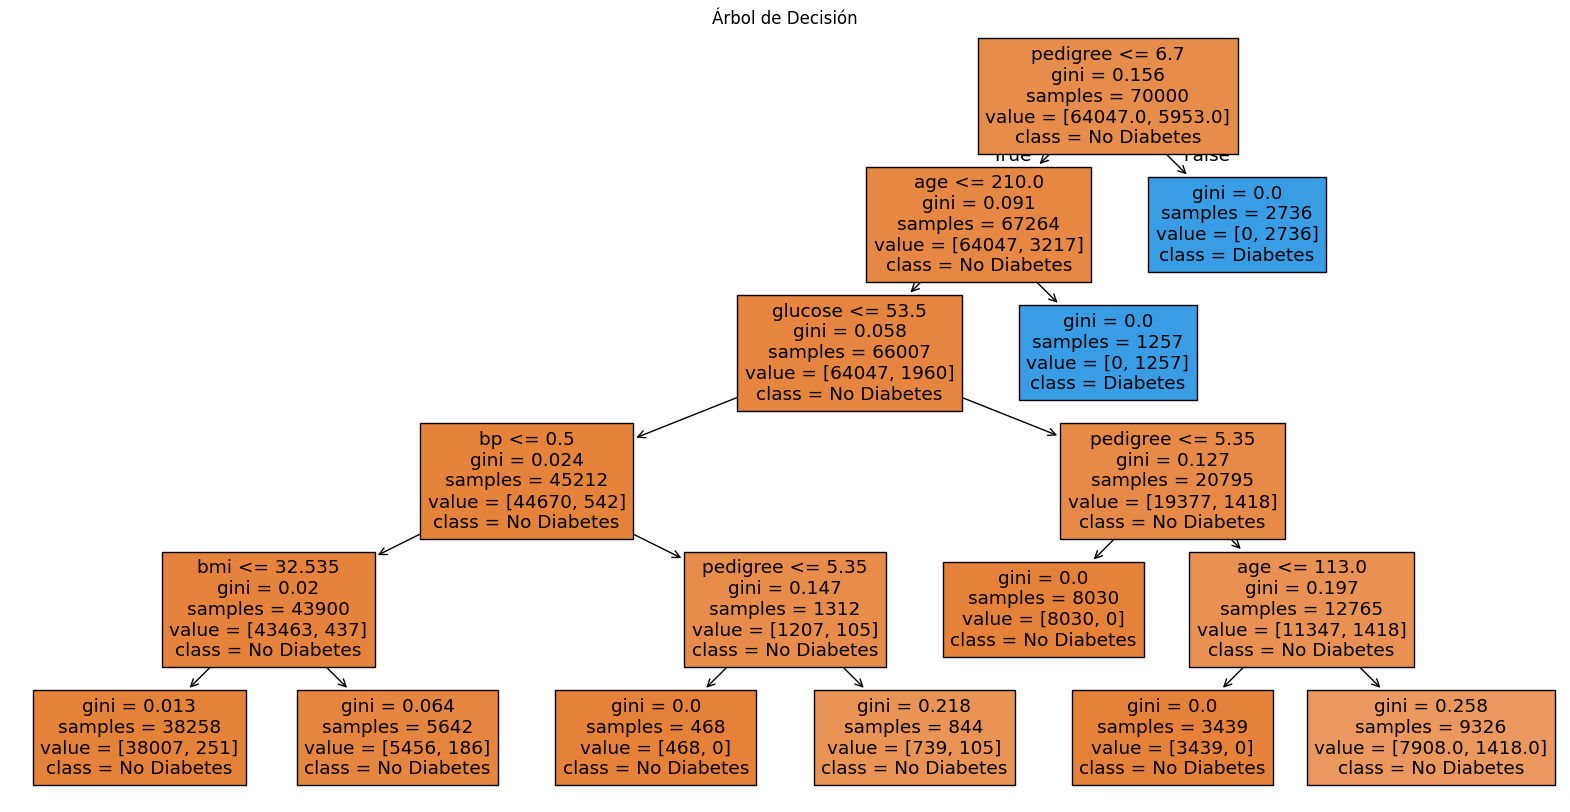

In [23]:

# Árbol
plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Árbol de Decisión")
plt.show()


predicción  paciente

In [11]:
# Simulación de un nuevo paciente con valores clínicos
nuevo_paciente = {
    'pregnant': 2,
    'glucose': 145,
    'bp': 80,
    'skin': 35,
    'insulin': 130,
    'bmi': 32.5,
    'pedigree': 0.45,
    'age': 40
}


In [12]:
# Convertir a DataFrame con una sola fila
df_paciente = pd.DataFrame([nuevo_paciente])


 predicción usando el modelo



In [14]:
# Remove the 'pregnant' column from the new patient data
df_paciente = df_paciente.drop('pregnant', axis=1)

# Predicción con el modelo entrenado
prediccion = modelo.predict(df_paciente)

# Mostrar el resultado
if prediccion[0] == 1:
    print("🔴 El modelo predice: SÍ tiene diabetes.")
else:
    print("🟢 El modelo predice: NO tiene diabetes.")

🟢 El modelo predice: NO tiene diabetes.


 probabilidad de la predicción

 Resultado

In [15]:
# Mostrar las probabilidades para cada clase [No, Sí]
probabilidades = modelo.predict_proba(df_paciente)
print(f"🔍 Probabilidad de NO tener diabetes: {probabilidades[0][0]:.2f}")
print(f"🔍 Probabilidad de SÍ tener diabetes: {probabilidades[0][1]:.2f}")


🔍 Probabilidad de NO tener diabetes: 1.00
🔍 Probabilidad de SÍ tener diabetes: 0.00
